In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\avira\AppData\Local\Temp\ipykernel_7384\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(-0.5, 63.5, 63.5, -0.5)

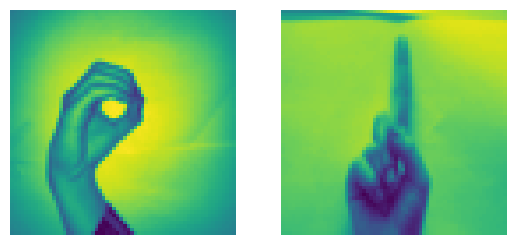

In [2]:
X_full = np.load('X.npy')
Y_full = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X_full[408].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_full[1027].reshape(img_size, img_size))
plt.axis('off')


In [3]:
X = np.concatenate((X_full[204:409],X_full[822:1027]),axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate(([z,o]),axis=0).reshape(X.shape[0],1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

# Logistic Regression from scratch

In [7]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [8]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [9]:
def forward_and_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]     
    d_w = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    d_b = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": d_w,"derivative_bias": d_b}
    return cost,gradients

In [10]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterations):
    cost_1=[]
    cost_2=[]
    index=[]

    for i in range(number_of_iterations):
        cost,gradients = forward_and_backward_propagation(w,b,x_train,y_train)
        cost_1.append(cost)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        if i%10 ==0:
            cost_2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))  
            parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_2)
    plt.xlabel('number of iterations')
    plt.ylabel("cost")
    plt.show()
    return parameters,gradients,cost_1

In [11]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


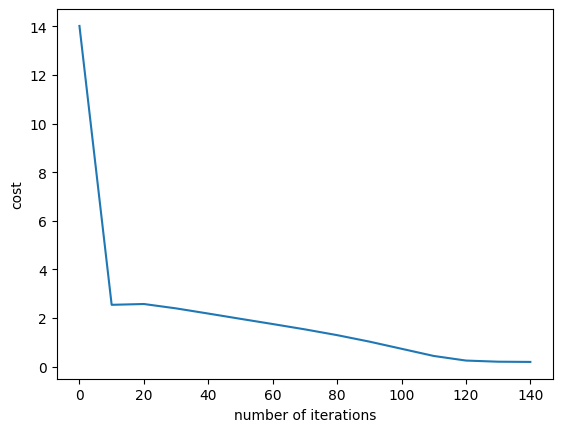

train accuracy: 92.52873563218391 %
test accuracy: 93.54838709677419 %


In [12]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)


# ANN FROM SCRATCH

In [13]:
def initialize_parameters_and_layers_sizes_NN(x_train,y_train):
    parameters = {"w1":np.random.randn(3,x_train.shape[0])*0.1,
                  "b1":np.zeros((3,1)),
                  "w2":np.random.randn(y_train.shape[0],3)*0.1,
                  "b2":np.zeros((y_train.shape[0],1))}
    return parameters

In [14]:
def forward_propagation_NN(x_train,parameters):
    Z1 = np.dot(parameters["w1"],x_train) + parameters["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['w2'],A1) + parameters["b2"]
    A2 = sigmoid(Z2)
    cache = {"Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    return A2,cache

In [15]:
def Compute_cost_NN(A2,Y,parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [16]:
def backward_propogation_NN(parameters,cache,X,Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis=1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["w2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads



In [17]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"w1": parameters["w1"]-learning_rate*grads["dweight1"],
                  "b1": parameters["b1"]-learning_rate*grads["dbias1"],
                  "w2": parameters["w2"]-learning_rate*grads["dweight2"],
                  "b2": parameters["b2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [18]:
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.339814


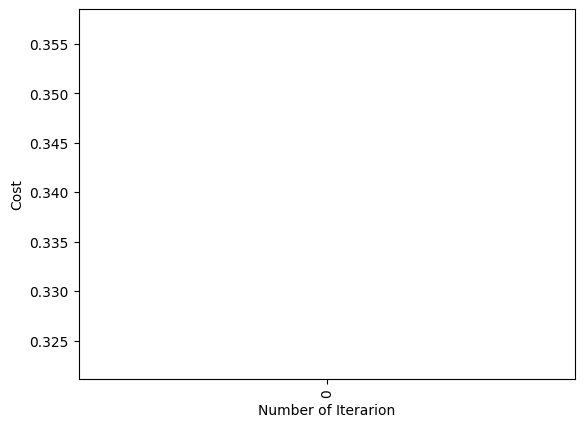

train accuracy: 50.862068965517246 %
test accuracy: 43.548387096774185 %


In [19]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layers_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = Compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propogation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=1)

In [21]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100


c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - loss: 0.6933  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6280 - loss: 0.6928 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4930 - loss: 0.6923 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5212 - loss: 0.6912 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5194 - loss: 0.6891 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.4896 - loss: 0.6896
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5172 - loss: 0.6856 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5176 - loss: 0.6792 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5056 - loss: 0.6692 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6182 - loss: 0.6572 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6001 - loss: 0.6344 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6210 - loss: 0.6095 

c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5131 - loss: 0.6930  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5022 - loss: 0.6924 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5212 - loss: 0.6912
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4789 - loss: 0.6921 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.5215 - loss: 0.6880
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5266 - loss: 0.6844 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6464 - loss: 0.6809 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5577 - loss: 0.6728 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.6620 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8708 - loss: 0.6447 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7826 - loss: 0.6156 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9027 - loss: 0.58

c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\avira\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4918 - loss: 0.6931  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 0.6923 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4937 - loss: 0.6914 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5146 - loss: 0.6883 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.5418 - loss: 0.6846
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 0.6794 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5515 - loss: 0.6786 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5142 - loss: 0.6663 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.7204 - loss: 0.6441
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7451 - loss: 0.6152 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.5763 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8305 - loss: 0.5296